In [1]:
from obspy import read

In [2]:
st = read("http://examples.obspy.org/IU_ULN_2015-07-18T02.mseed")

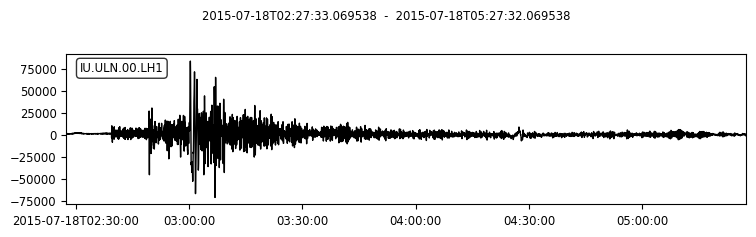

C:\soft\py3_10_5\WPy64-31050\python-3.10.5.amd64\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


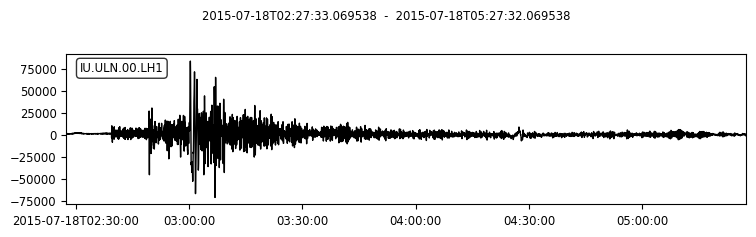

In [3]:
st[0].plot()

In [4]:
df = st[0].stats.sampling_rate

In [5]:
from obspy import signal

In [6]:
from obspy.signal import trigger

In [7]:
cft = trigger.classic_sta_lta(st[0].data, int(5*df), int(10*df))

In [8]:
import numpy as np

In [9]:
raw_sample = st[0].data[np.argmax(cft>1.75):]

In [10]:
drum_sample = raw_sample/(raw_sample.max() - raw_sample.min())*1.5

In [11]:
import matplotlib.pyplot as plt

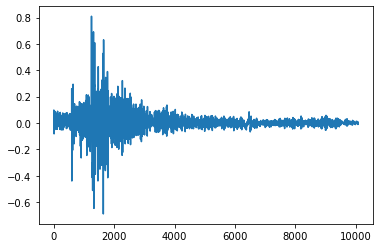

In [12]:
plt.plot(drum_sample);

In [13]:
import ipytone

In [14]:
drum_buffer = ipytone.AudioBuffer(drum_sample)

In [15]:
player = ipytone.Player(drum_buffer).to_destination()

In [16]:
player.start().stop("+1")

Player()

In [17]:
import librosa

In [18]:
librosa.output.write_wav('audio/tone_440.wav', drum_buffer, 22050)

AttributeError: module 'librosa' has no attribute 'output'

In [18]:
import soundfile as sf

In [21]:
sf.write('F:/stereo_file1.wav', drum_sample, 48000, 'PCM_24')